In [3]:
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.8


# COMENTARIOS SOBRE O TRABALHO

#### Com base no conjunto de dados extraidos do _dataset_ [house sales prediction](https://www.kaggle.com/harlfoxem/housesalesprediction) do _[kaggle](https://www.kaggle.com/)_, a ideia é encontrar boas oportunidades de negocio na compra e venda de imoveis. Para isso, será necessario responder algumas questões:


- Quais casas deveria comprar e por qual preço de compra?
- Uma vez a casa comprada, qual o melhor momento para vendê-las e qual seria o preço da venda?
- Deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?

#### Para a solução do problema, uma sugestão de roteiro seria:
    1. Identifique a causa raíz.
    2. Questione o motivo das perguntas feitas e faça novas perguntas tentando entender o real motivo dessa ação
    3. Colete os dados ( Os dados estão no link acima )
    4. Aplique uma limpeza nos dados.
    5. Entenda as variáveis disponíveis, possíveis valores faltantes, faça uma estatística descritiva para entender as características dos dados.
    6. Levante Hipóteses sobre o Comportamento do Negócio.
    7. Casas com garagens são mais caras? Porque?
    8. Casas com muitos quartos são mais caras? Porque? A partir de quantos quartos o preço aumenta? Qual o incremento de preço por cada quarto adicionado?
    9. As casas mais caras estão no centro? Qual a região? Existe alguma coisa na região que tem correlação com valor de venda da casa? Shoppings? Montanhas? Pessoas Famosas?
    10. Faça uma ótima Análise Exploratória de Dados.
    11. Quais hipóteses são falsas e quais são verdadeiras?
    12. Escreve os Insights que você encontrou
    13. Escreve possíveis soluções para o problema.

## Legenda dos dados
- id- numero de identificação.
- date - data de venda do imovel
- price - preço de venda do imovel.
- bedrooms - quartos.
- bathrooms - banheiros.
- sqft_living - area em pés quadrados da casa.
- sqft_lot - area em pés quadrados do terreno.
- sqft_above - area em pés quadrados do soltão.
- sqft_basement - area em pés quadrados do porão
- floors - pisos/andadres
- waterfront - região de praia. obs: esse campo possui valores logicos, **0** é **False** e **1** é **True**.
- view - vista: porem não consigo entender o que essa informação significa
- condition - condição: porem não consigo entender o que essa informação significa
- grade - é uma classificação das casas, que varia de **1** à **13**
- yr_built - ano de construção
- yr_renovate - ano de reforma
- zipcode - algo como um cep nos estados unidos
- long - longitude da localização do imovel
- lat - latitude da localização do imovel

### Primeiros Insigths
- Iremos inciar a solução do problema explorando os dados, observando medias, medianas e desvios padrões.

- Isso será necesario para entender bem a base de dados com que estamos trabalhando. Após esse momento podemos limpar os dados retirando informações desnecessarias e manipula-los de acordo com a necessidade pra solucionar o problema.

### Preparando ambiente.
- O primeiro passo é importar as bibliotecas e pacotes necessarios.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Primeiros Insigths
- Iremos inciar a solução do problema explorando os dados, observando medias, medianas e desvios padrões.

- Isso será necesario para entender bem a base de dados com que estamos trabalhando. Após esse momento podemos limpar os dados retirando informações desnecessarias e manipula-los de acordo com a necessidade pra solucionar o problema.

# Explorando os Dados

Carregando os dados

In [5]:
HouseData= pd.read_csv('./kc_house_data.csv')

Fazendo primeira leitura dos dados.

In [6]:
HouseData.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Observando os tipos de dados da base

In [7]:
print(HouseData.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [8]:
HouseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Gerando um resumo de estatistica descritiva

In [9]:
HouseData.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Comprovando a inexistencia de dados nulos

In [10]:
print("numero de valores NaN para a coluna price :", HouseData['price'].isnull().sum())
print("numero de valores NaN para a coluna bathrooms :", HouseData['bathrooms'].isnull().sum())
print("numero de valores NaN para a coluna bedrooms :", HouseData['bedrooms'].isnull().sum())
print("numero de valores NaN para a coluna sqft_living :", HouseData['sqft_living'].isnull().sum())
print("numero de valores NaN para a coluna sqft_lot :", HouseData['sqft_lot'].isnull().sum())
print("numero de valores NaN para a coluna floors :", HouseData['floors'].isnull().sum())
print("numero de valores NaN para a coluna waterfront :", HouseData['waterfront'].isnull().sum())
print("numero de valores NaN para a coluna view :", HouseData['view'].isnull().sum())
print("numero de valores NaN para a coluna condition :", HouseData['condition'].isnull().sum())
print("numero de valores NaN para a coluna grade :", HouseData['grade'].isnull().sum())
print("numero de valores NaN para a coluna sqft_above :", HouseData['sqft_above'].isnull().sum())
print("numero de valores NaN para a coluna sqft_basement :", HouseData['sqft_basement'].isnull().sum())
print("numero de valores NaN para a coluna yr_built :", HouseData['yr_built'].isnull().sum())
print("numero de valores NaN para a coluna yr_renovated :", HouseData['yr_renovated'].isnull().sum())
print("numero de valores NaN para a coluna zipcode :", HouseData['zipcode'].isnull().sum())
print("numero de valores NaN para a coluna lat :", HouseData['lat'].isnull().sum())
print("numero de valores NaN para a coluna long :", HouseData['long'].isnull().sum())

numero de valores NaN para a coluna price : 0
numero de valores NaN para a coluna bathrooms : 0
numero de valores NaN para a coluna bedrooms : 0
numero de valores NaN para a coluna sqft_living : 0
numero de valores NaN para a coluna sqft_lot : 0
numero de valores NaN para a coluna floors : 0
numero de valores NaN para a coluna waterfront : 0
numero de valores NaN para a coluna view : 0
numero de valores NaN para a coluna condition : 0
numero de valores NaN para a coluna grade : 0
numero de valores NaN para a coluna sqft_above : 0
numero de valores NaN para a coluna sqft_basement : 0
numero de valores NaN para a coluna yr_built : 0
numero de valores NaN para a coluna yr_renovated : 0
numero de valores NaN para a coluna zipcode : 0
numero de valores NaN para a coluna lat : 0
numero de valores NaN para a coluna long : 0


### Comentarios até o momento
- Podemos observar que poucas casas estão localizados em região de praia(**_waterfront_**), sabendo que este campo é composto apenas por valores **zero** e **um** sendo que **um significa estar em região de praia**, observamos que a media é pequena e pelo menos **75%** das casas tem valor **0**. Isso indica que esse campo terá **pouca ou nenhuma influencia no resultado final** do dados e por isso podemos **desconsiderar a sua participação na analise**.
- O mesmo ocorre para o campo **_view_**, que possui **pouca o nenhuma influencia no resultado final** visto que a media é puxada por um _outlier_, porem, pelo menos **75%** dos valores esta´abaixo de zero.
- Existe um _outlier_ nos quartos(**_bedrooms_**) que possui 33 quartos. A media está em **3,38** e **75%** das casas tem até **4** quartos. Importante observar outros _outliers_ nesse campo pois é um campo sabidamente determinante sobre o preço dos imoveis.
- Note tambem que não existem valores nulos nas colunas.

#### Analisando outliers

In [11]:
maxqrts=HouseData['bedrooms'].idxmax()
print(maxqrts)

15870


In [12]:
print(HouseData.loc[[maxqrts]])

               id             date     price  bedrooms  bathrooms  \
15870  2402100895  20140625T000000  640000.0        33       1.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
15870         1620      6000     1.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
15870        1040            580      1947             0    98103  47.6878   

          long  sqft_living15  sqft_lot15  
15870 -122.331           1330        4700  

[1 rows x 21 columns]


**Note que a casa com 33 quartos tem _price_(preço) de 640 mil, que é muito proximo da media para esse campo que está em 540,088 mil, ou seja, toda essa quantidade de quartos pode influenciar negativamente no resultado final da analise porque para esse imovel em expecifico, a quantidade de quartosnão tem o peso esperado na construção do preço.**

In [13]:
maxgrd=HouseData['grade'].idxmax()
print(maxgrd)

4411


In [14]:
print(HouseData.loc[[maxgrd]])

              id             date      price  bedrooms  bathrooms  \
4411  2470100110  20140804T000000  5570000.0         5       5.75   

      sqft_living  sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
4411         9200     35069     2.0           0     0  ...     13        6200   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
4411           3000      2001             0    98039  47.6289 -122.233   

      sqft_living15  sqft_lot15  
4411           3560       24345  

[1 rows x 21 columns]


**Para esse caso a avaliação da casa é maxima, com o preço de 5,57 milhões, possui dois andares/pisos e area da casa e do terreno/area externa muito superiror a media.Este dado pode refletir bem o comportamento esperado**

In [15]:
maxdf=HouseData['price'].idxmax()
print(maxdf)

7252


In [16]:
print(HouseData.loc[[maxdf]])

              id             date      price  bedrooms  bathrooms  \
7252  6762700020  20141013T000000  7700000.0         6        8.0   

      sqft_living  sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
7252        12050     27600     2.5           0     3  ...     13        8570   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7252           3480      1910          1987    98102  47.6298 -122.323   

      sqft_living15  sqft_lot15  
7252           3940        8800  

[1 rows x 21 columns]


**Note que para esse caso, a casa com maior preço está em 7,7milhões, valor muito superior a media, porém diversos valores dessa casa estão muito superiores a media, como os metros quadarados de area externa ou terreno, a area da casa, o fato de possui dois pisos/andares e ter valor maximo na avalição, por tanto, apesar do valor alto, este dado pode refletir bem o comportamento esperado.**

In [17]:
#Realizamos um filtro para retirar todos os imoveis que tenham quantidade de quartos maior ou igual a 6
fq6 = HouseData['bedrooms']<6 #fq6 significa Filtro p/ Quartos maior igual a 6
rfq6 = HouseData[fq6] #rfq6 é o Resultado para o filtro fq

In [18]:
import seaborn as sn

#### Assumindo ρ como o coeficiente de correlação gerado acima, podemos enteprtar os dados como:
* ρ = 0,9 e 1 (positivo ou negativo): correlação muito forte com influencia direta sobre o preço;
* ρ = 0,7 e 0,8 (positivo ou negativo): correlação forte com influencia direta sobre o preço;
* ρ = 0,5 e 0,6 (positivo ou negativo): correlação moderada sem influencia direta sobre o preço;
* ρ = 0,3 e 0,4 (positivo ou negativo): correlação fraca sem influencia direta sobre o preço;
* ρ = 0 a 0,2 (positivo ou negativo): não possui correlação.

Essas __decisões__ a respeito das correlações foram tomadas por estarmos buscando os __campos__ que tem **MAIOR INFLUENCIA** sobre o __preço__, pois de certa forma, praticamente todos os campos irão influenciar o preço à um determinado nivel, mas precisaamos __entender__ quais são os pontos mais importantes para melhor decidir sobre a **compra e venda dos imoveis**. 

Contudo é um pouco dificil identificar os pontos de maior correlação. Por isso vamos importar a biblioteca do seaborn para gerar um mapa de de calor(heatmap)

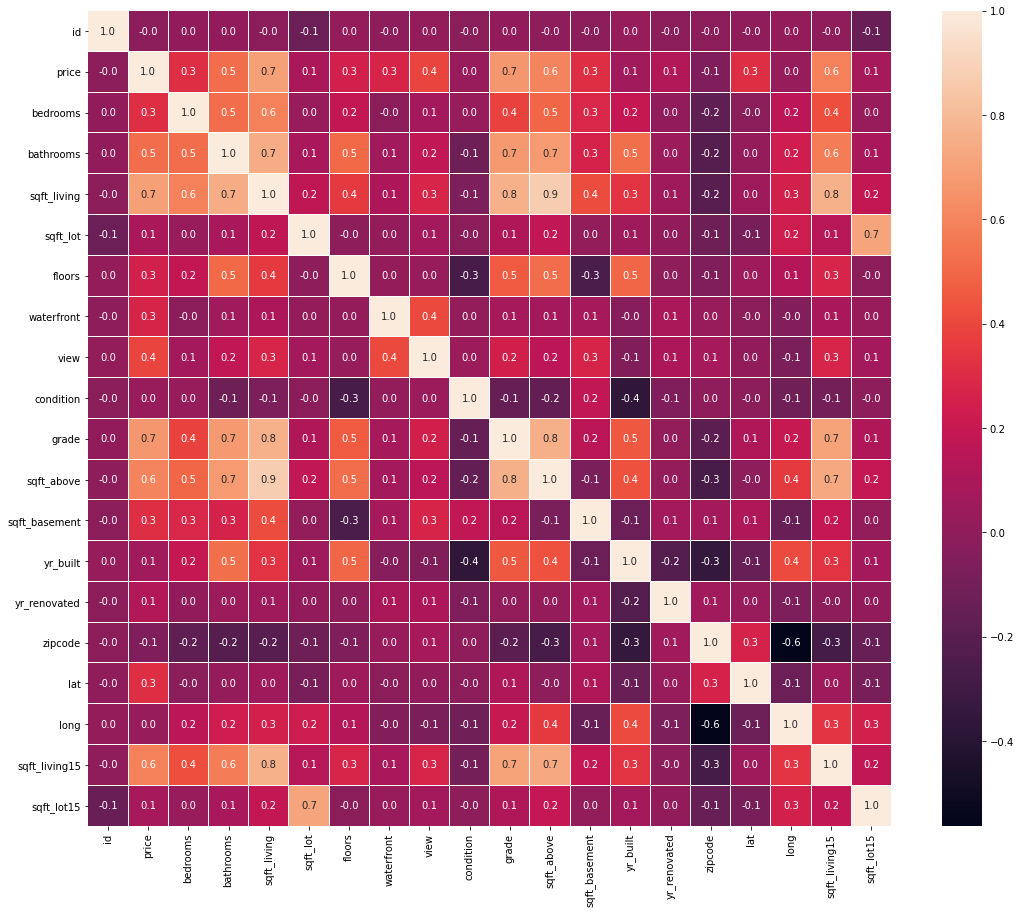

In [19]:
#Avaliando a correlaçõa entre as variaveis.
corel = rfq6.corr()
plt.figure(figsize=(18, 15)) #Ajusta o tamanho da figura. Importante saber que o seaborn é baseado em matplotlib.pyplot que 
#foi importado nesse notebook como plt, assim, alterando o tamanho das figuras do matplotlib eu altero o tamanho das figuras#
#do seaborn.
plot = sn.heatmap(corel,  annot = True, fmt='.1f', linewidths=.01)

### Conclusões da exploração de dados.

- No estudo, observamos descrições estatisticas dos nossos dados, a exuistencia de oultiliers que form retirados e o comportamento dos dados sem esse oultiliers, e com base em conhecimentos previos a esse notebook da nossa base de dados e na analise do grafico de correlações temos:
    1. O preço da casa é influenciado diretamente pela avaliação(_grade_) e pela area da casa (_sqft_living_).
    2. A avaliação é inlfuenciada diretamente pela area da casa(_sqft_living_), da area do soltão(_sqft_above_) e pela quantidade de banheiros(_bathrooms_).
    3. Pelo conhecimento sobre a area de negocio era esperado que o preço ou a avaliação sofrencia influencia dirta do ano de construção ou de reforma, da quantidade de andares, de banheiros, e da area externa do imovel, além do fato de estar ou não em area de praia. Porém isso não se confirmou com o estudo feito sobre a base de dados.
    4. É possivel concluir desse estudo, que com o objetivo de lucrar com os imoveis, seria interesante para a empresa comprar imoveis com uma avaliação mais baixa e investisse em aumentar a rea da casa, do soltão ou a quantidade de banheiros, visto que pelo estudo esses campos influenciam na avliação e por consequencia no preço.
 

## Analise de dados

In [20]:
prc = rfq6['price']#preço do imovel
adc = rfq6['sqft_living']#area da casa
avl = rfq6['grade']#avaliação ou grade
ast = rfq6['sqft_above']#area do soltão
bnh = rfq6['bathrooms']#quantidade de banheiros


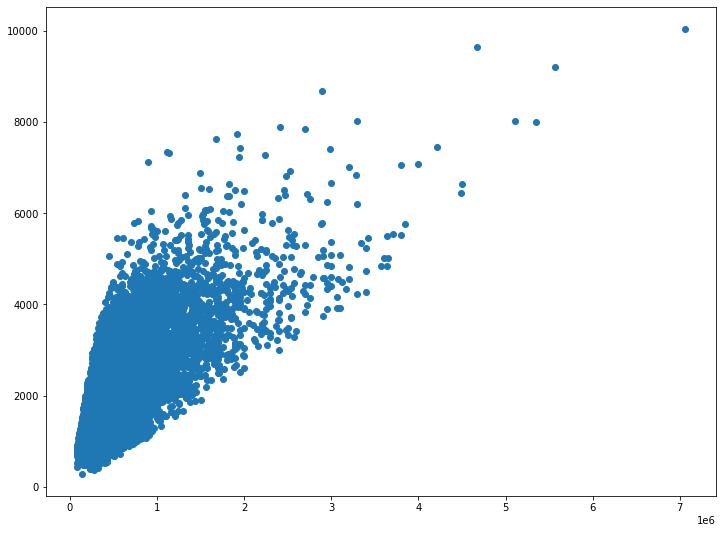

In [21]:
plt.figure(figsize=(12, 9))
plt.scatter(prc,adc)#prc é o eixo "x" e adc o eixo "y"
plt.show()

- Analisando o grafico, podemos ter como ponto bom de comprar casas com area entre 2000 e 4000 pés quadrados, quando as casas cutam no maximo aproximadamente 2,5milhões, e como ponto bom de venda casas com area entre 5500 e 6000 pés quadrados, quando o valor das casas pode chegar a 4milhões podendo então ter um lucro de até 1,5milhões entre a compra e venda do imovel. 
- A faixa de preço indicada para a compra está abaixo do percentil de .25, o que limita muito a quantidade de imoveis, contudo o valor indicado para a venda está abaixo do percentil de .75, o que indica que o preço de venda é competitivo. Observe tambem que a faixa da area indicada para a compra estáentre os percentis de .25 e passa do percentil de .75 e para a venda está acima do percentil de .75, o que nos mostra que existira vantagem competitiva em realizar a reforma fazendo o imovel ganhar muito destaque e valor.

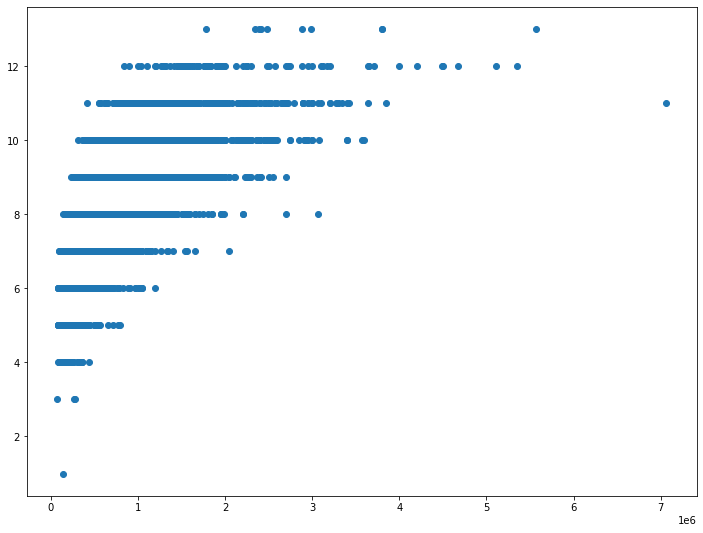

In [22]:
plt.figure(figsize=(12, 9))
plt.scatter(prc,avl)#prc é o eixo "x" e avl o eixo "y"
plt.show()

- Analisando o grafico, podemos ter como ponto bom de compra casa com valiação até 7, quando custam no maximo aproximadamente 2milhões, e como ponto bom de venda casas com valiação entre 8 e 10 quando custam até 4milhões podendo ter um lucro de até 2milhões entre a compra e venda do imovel.
- A faixa de preço indicada tem caracteristicas semelhantes a anteriror e o valor de venda é competitivo. Já para a faixa de valor da avaliação do imovel observe que a compra está abaixo do percentil .50 e a venda acima do percentil .75. Note que o valor de venda índicado é comum enquanto a avaliação pode ser muito supeiror a media que está em 7.6, fato que torna o imovel mais atraente a compra pelo cliente, ou seja, aumeta a certeza de lucro na negociação.

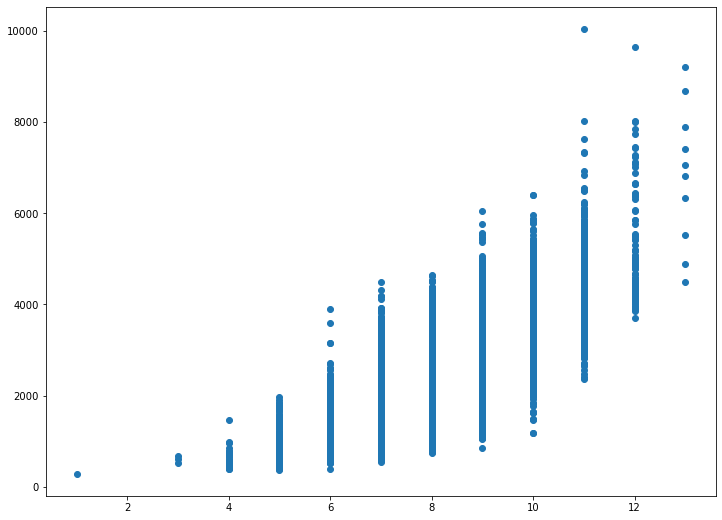

In [23]:
plt.figure(figsize=(12, 9))
plt.scatter(avl,adc)#avl é o eixo "x" e adc o eixo "y"
plt.show()

- Essa analise é indireta em relação ao preço, por tanto devemos nos ater em olhar os imoveis que condizem com as faixas de avaliação do ponto bom de compra e do ponto bom de venda.
- Note que para imoveis com avaliação até 7, que seria o ponto bom de compra, temos uma area da casa de ate 4500 pés quardrados e os imoveis que estão entre a avaliação 8 e 10, que seria o ponto bom de venda, temos uma area da casa entre 4500 e 6500 pés quadrados, o que concorda com a nossa avaliação de ponto de compra e venda do imovel com relação a area da casa.

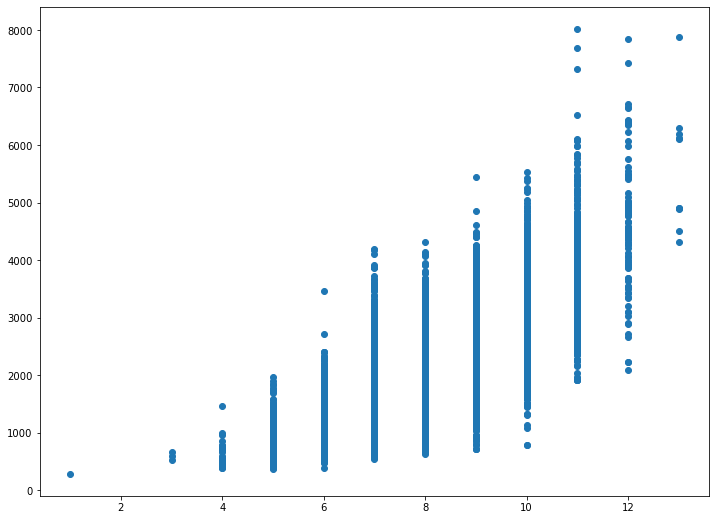

In [24]:
plt.figure(figsize=(12, 9))
plt.scatter(avl,ast)#avl é o eixo "x" e ast o eixo "y"
plt.show()

- Essa analise tambem é indireta em relação ao preço, por tanto tambem devemos nos ater em olhar os imoveis que condizem com as faixas de avaliação do ponto bom de compra e do ponto bom de venda.
- Note que imoveis com avaliação até 7 possuem area do soltão menor que 4500 pés quadrados, que podem compreender imoveis acima do percentil .75, além disso temos que para imoveis com avaliação entre 8 e 10 temos area do soltão entre 4500 e 5500 pés quadrados o que está acima do percentil .75. Logo a compra e a venda se apresentam de forma competitiva pois é possivel até comprar casa que não possuam soltão e então reforma-las aumentando em muito seu valor monetario.

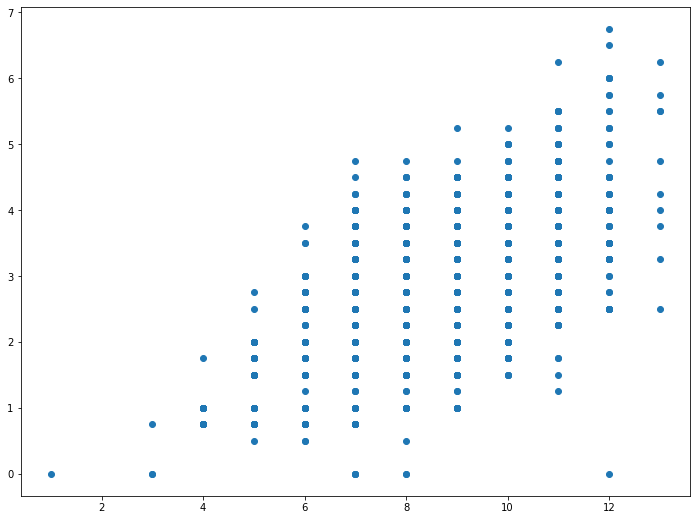

In [25]:
plt.figure(figsize=(12, 9))
plt.scatter(avl,bnh)#avl é o eixo "x" e bnh o eixo "y"
plt.show()

- Essa analise tambem é indireta em relação ao preço, por tanto tambem devemos nos ater em olhar os imoveis que condizem com as faixas de avaliação do ponto bom de compra e do ponto bom de venda.
- Note que imoveis com avaliação até 7 possuem até 4 banheiros(considerando o maior inteiro), que podem compreender imoveis acima do percentil .75, além disso temos que para imoveis com avaliação entre 8 e 10 temos entre 4 e 5 banheiros o que está acima do percentil .75. Logo a compra e a venda se apresentam de forma competitiva pois é possivel até comprar casa que não possuam banheiros ou tem apenas 1 ou 2 e então reforma-las aumentando em muito seu valor monetario.

### Em analise final
##### Podemos definir como imoveis bons para a compra os que possuem as seguintes caracteristicas:
    1. Preço: entre 2 e 2,5 milhões
    2. Avaliação: menor que 7
    3. Area da casa: entre 2000 e 4500 pés quadrados
    4. Area do Soltão: menor que 4500
    5. Quantidade de banheiros: menor que 4
##### Podemos definir como imoveis bons para a venda os que possuem as seguintes caracteristicas:
    1. Preço: entre 4 e 4,5 milhões
    2. Avaliação: entre 8 e 10
    3. Area da casa: entre 4500 e 6500 pés quadrados
    4. Area do Soltão: entre 4500 e 5500
    5. Quantidade de banheiros: entre 4 e 5
##### O lucro medio esperado dessas negociações está entre 1,5 e 2,5milhões sem contar com as despesas da reforma.

### Ulitilizando o Sweetviz para avaliar a analise

In [26]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [27]:
import sweetviz as sv

my_report = sv.analyze(rfq6,"price")
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
